The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [7]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# importing data
nobel = pd.read_csv('data/nobel.csv')

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(nobel.head())
print(nobel.columns)
print(nobel.info)

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                                                                                                                                                                                                                           motivation  \
0                                                                                                  "in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions"   
1                                                                 "in speci

Male      905
Female     65
Name: sex, dtype: int64


<Figure size 800x600 with 0 Axes>

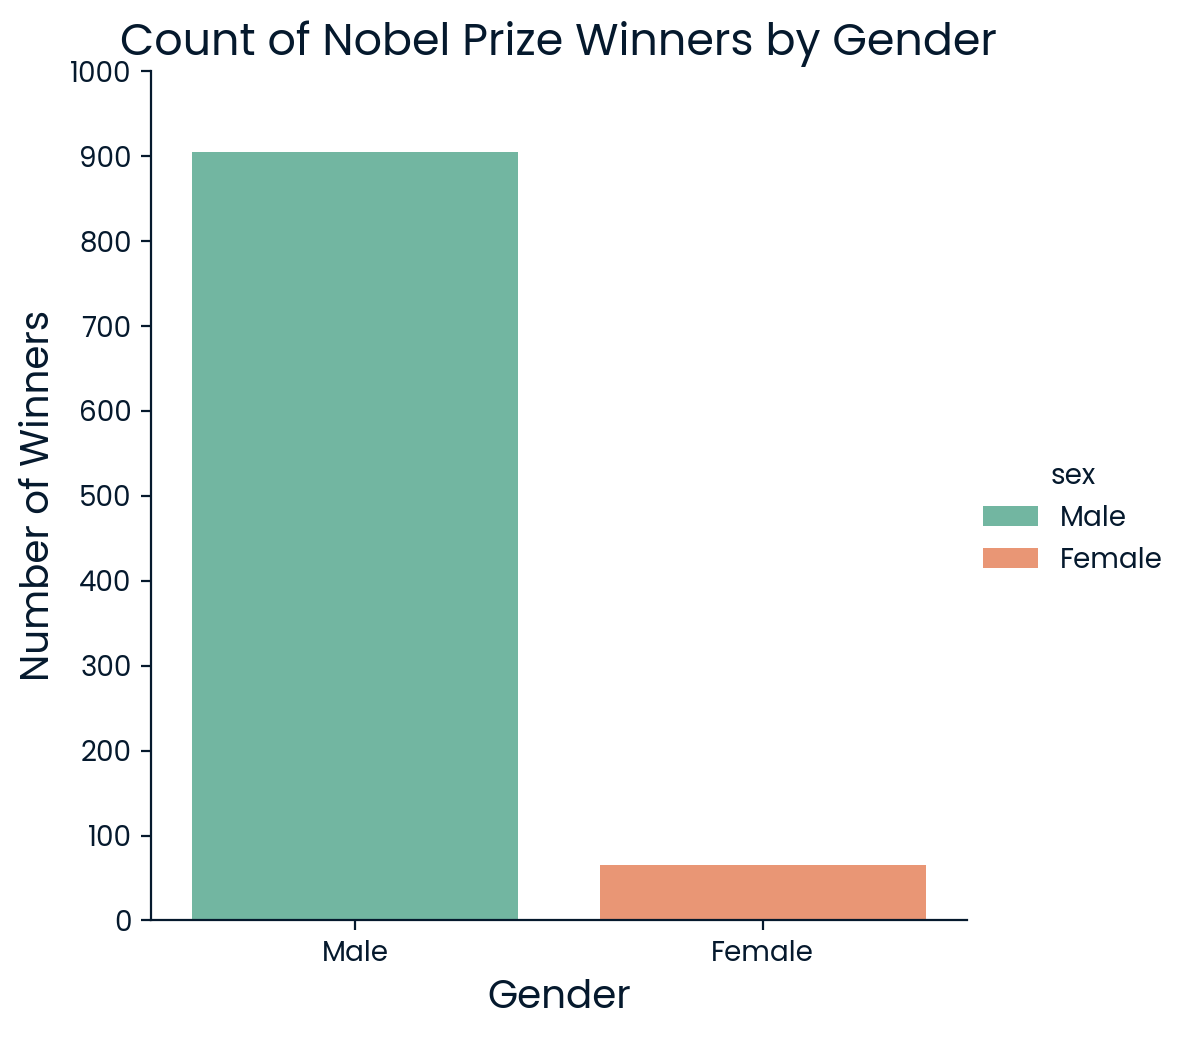

In [9]:
# What is the most commonly awarded gender and birth country?
# Store your answers as string variables top_gender and top_country.
# finding out the top gender
gender_counts = nobel['sex'].value_counts()
top_gender = gender_counts.idxmax()
print(gender_counts.head())
# plotting
plt.figure(figsize=(8, 6))
sns.catplot(x='sex', data=nobel, kind='count', hue='sex', palette='Set2')
plt.title("Count of Nobel Prize Winners by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Winners", fontsize=14)
plt.yticks(ticks=range(0, nobel['sex'].value_counts().max() + 100, 100))
plt.show()

United States of America


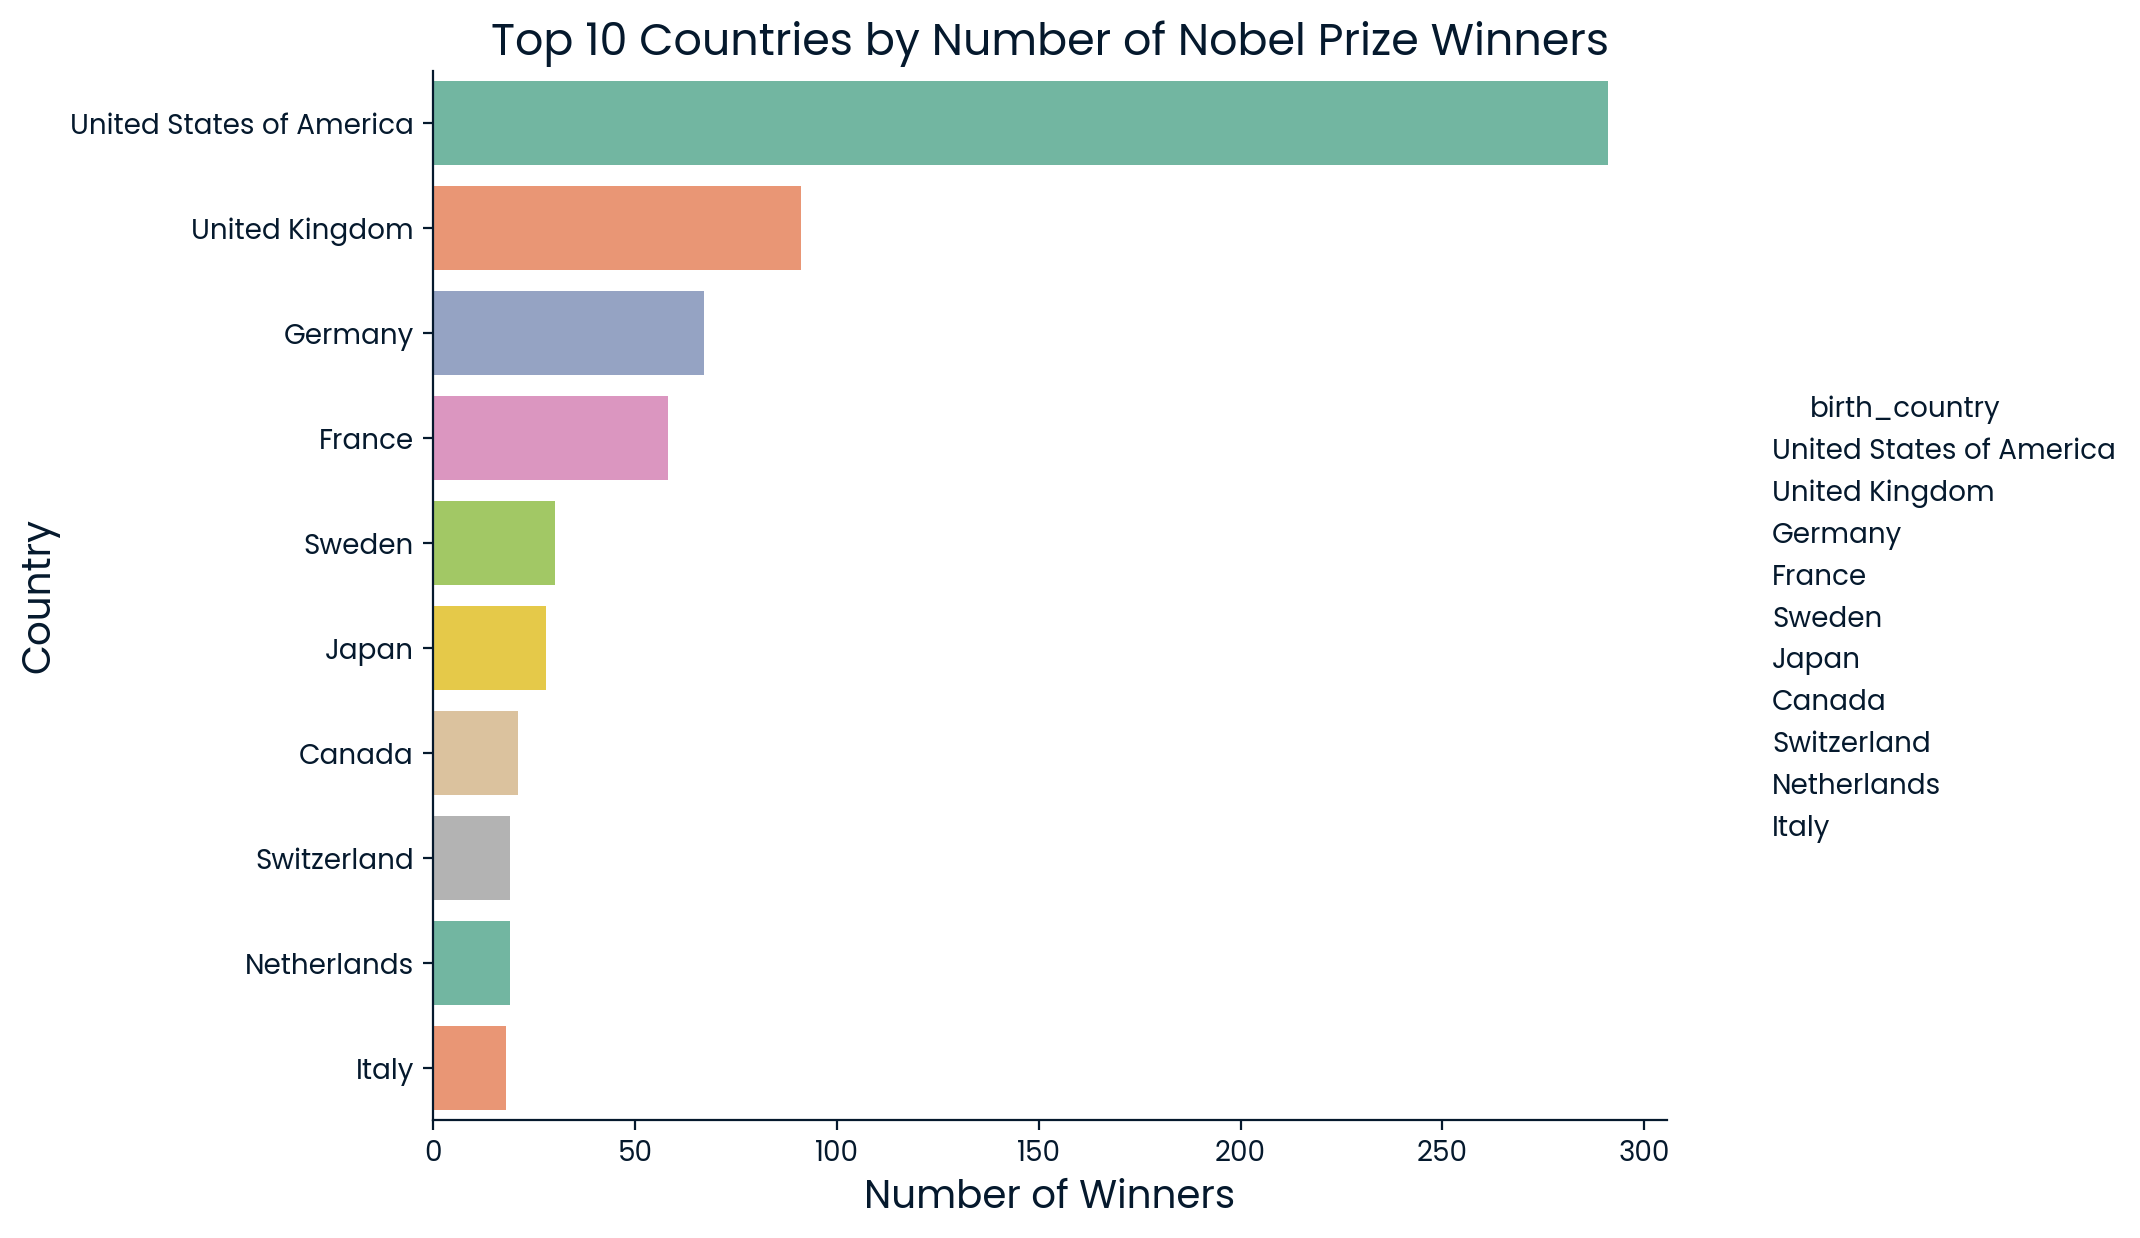

In [10]:
# finding out the top country
country_count = nobel['birth_country'].value_counts()
top_country = country_count.idxmax()
print(top_country)
# plotting top 10 countries
top_10_countries = nobel['birth_country'].value_counts().nlargest(10)
nobel_top_10 = nobel[nobel['birth_country'].isin(top_10_countries.index)]
sns.catplot(y='birth_country', data=nobel_top_10, kind='count', palette='Set2', height=6, aspect=1.5, order= top_10_countries.index)
plt.title("Top 10 Countries by Number of Nobel Prize Winners", fontsize=16)
plt.xlabel("Number of Winners", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.show()

Decade with highest ratio of US-born winners: 2000
None


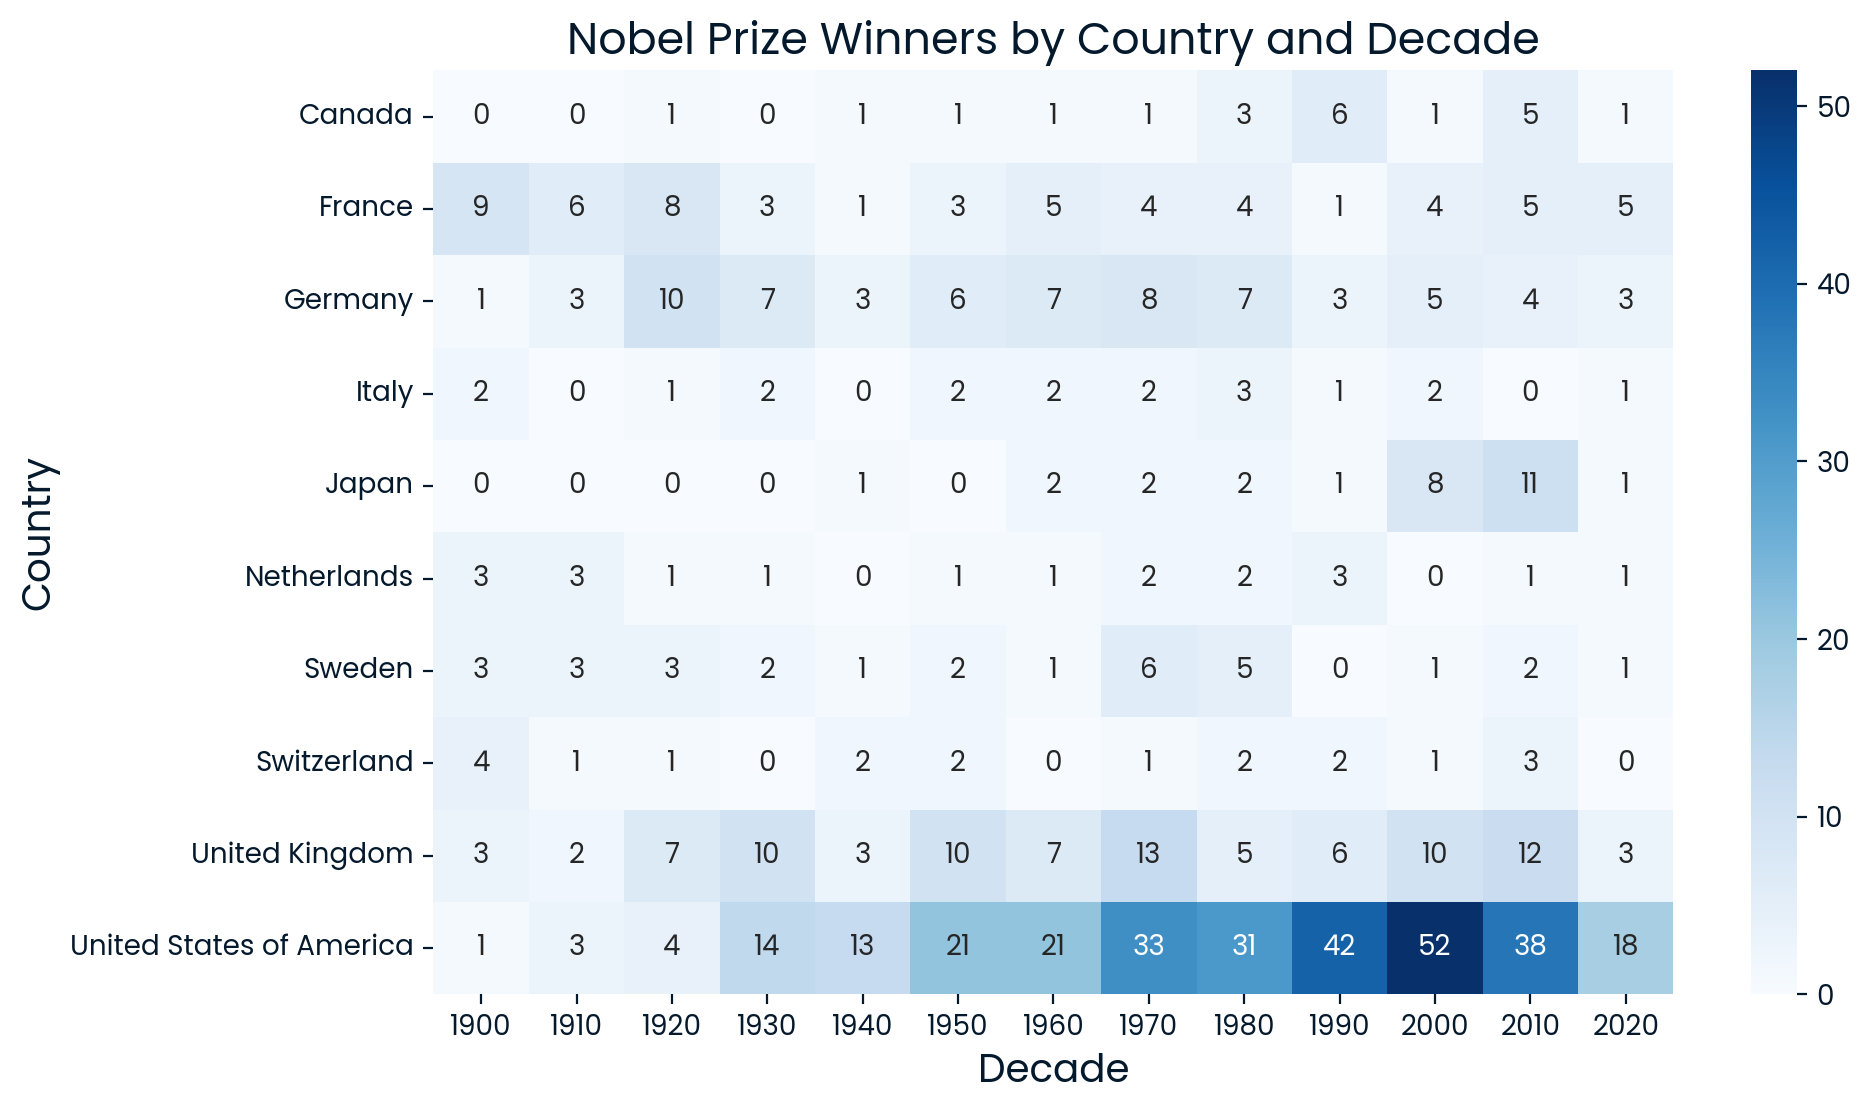

In [11]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
# Store this as an integer called max_decade_usa.
# creating a decade column
nobel['decade'] = (nobel['year'] // 10) * 10
# calculating total winners overall and USA winners
total_winners_per_decade = nobel.groupby('decade').size()
USA_winners_per_decade = nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').size()
# calculating ratio of us winners to total winners
ratio_us_winners = USA_winners_per_decade / total_winners_per_decade
# Finding highest ratio decade
max_decade_usa = ratio_us_winners.idxmax()
print(print("Decade with highest ratio of US-born winners:", max_decade_usa))
# plotting the top 10 countries number of winners over decades
top_10_countries = nobel['birth_country'].value_counts().nlargest(10).index
nobel_top_10 = nobel[nobel['birth_country'].isin(top_10_countries)]
heatmap_data = nobel_top_10.pivot_table(index='birth_country', columns='decade', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title("Nobel Prize Winners by Country and Decade", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.show()

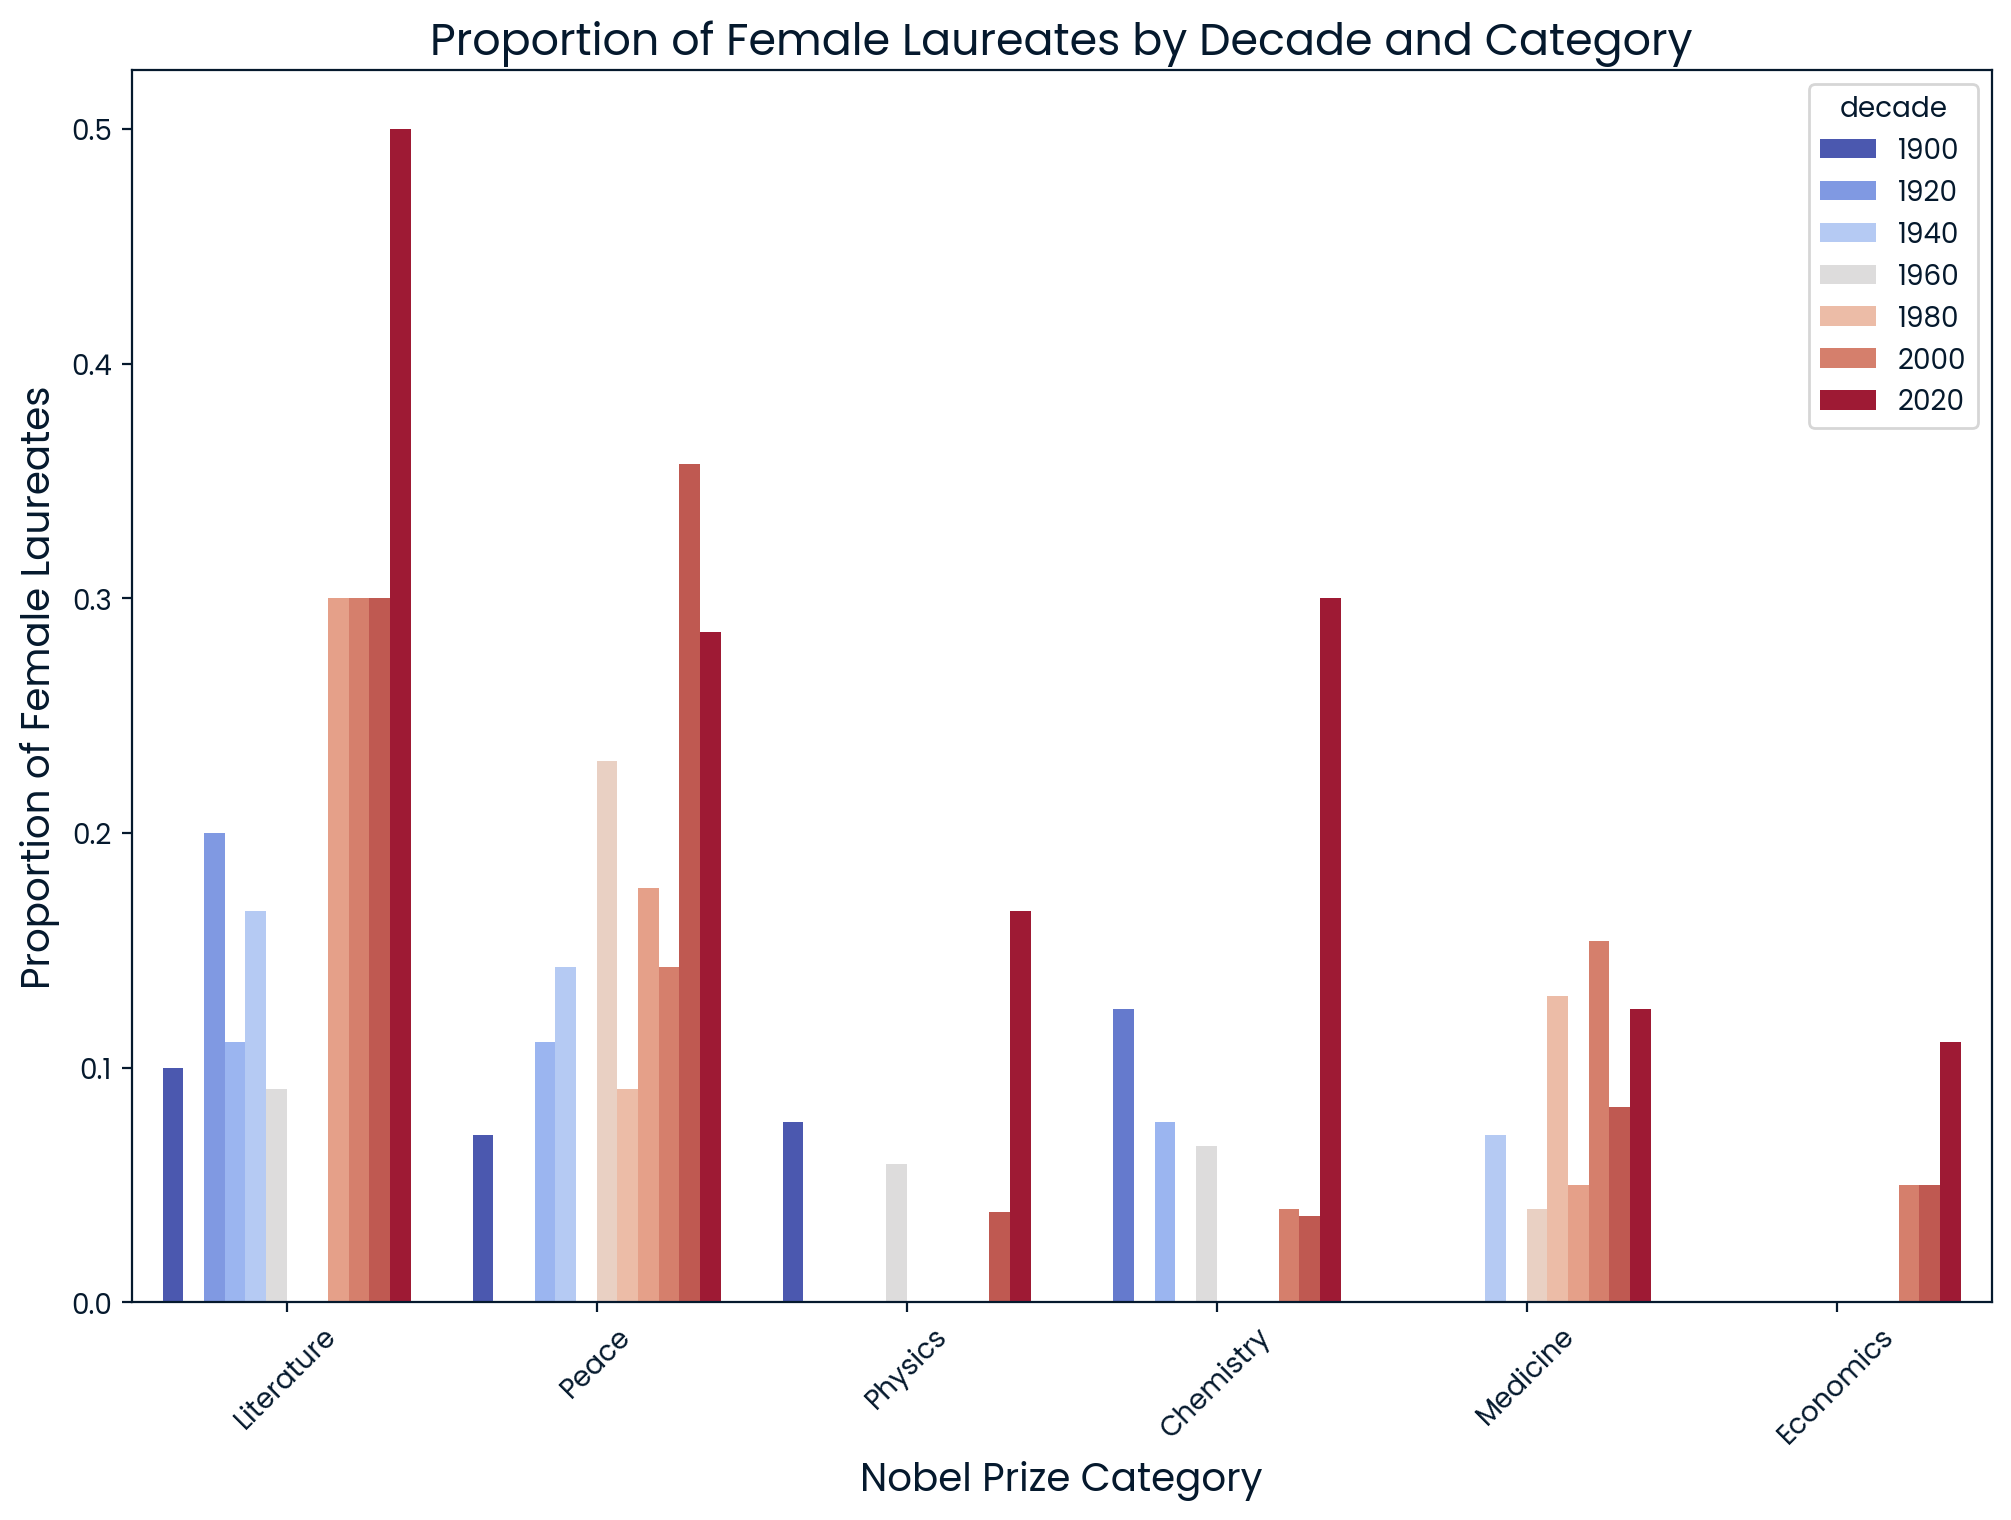

In [12]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
# Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
# filtering females and count
female_laureates = nobel[nobel['sex'] == "Female"]
female_count_per_group = female_laureates.groupby(['decade', 'category']).size()
#grouping decade, category with num of winners
total_laureates = nobel.groupby(['decade', 'category']).size()
# calculate female proportion
female_proportion = female_count_per_group / total_laureates
# finding maximum proportion value
female_proportion_idx = female_proportion.idxmax()
max_portion_value = female_proportion.max()
# storeing in dictionary
max_female_dict = {female_proportion_idx[0] : female_proportion_idx[1]}
# plotting
female_proportion = female_proportion.reset_index(name='proportion')
female_proportion = female_proportion.dropna(subset=['proportion'])
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='proportion', hue='decade', data=female_proportion, palette='coolwarm')
plt.title("Proportion of Female Laureates by Decade and Category", fontsize=16)
plt.xlabel("Nobel Prize Category", fontsize=14)
plt.ylabel("Proportion of Female Laureates", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [13]:
# Who was the first woman to receive a Nobel Prize, and in what category?
# Save your string answers as first_woman_name and first_woman_category.
first_female_laureate = female_laureates.sort_values("year").iloc[0]
first_woman_name = first_female_laureate['full_name']
first_woman_category = first_female_laureate['category']
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [14]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
# Store the full names in a list named repeat_list.
# grouping winners by the full_name
winner_count = nobel.groupby("full_name").size()
# which winner apeared more than once
repeat_winners = winner_count[winner_count > 1]
# extract full names and store to list
repeat_list = repeat_winners.index.tolist()

In [15]:
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
